In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

With the following code we have 500 evenly spaced numbers between 0 to 50

In [116]:
x=np.linspace(0,50,501)

In [117]:
#x

In [118]:
y=np.sin(x)

In [119]:
#y

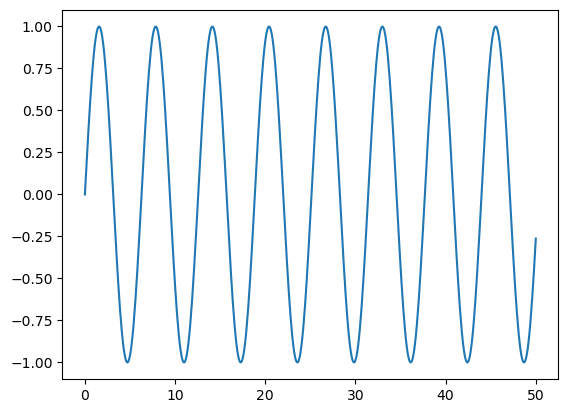

In [120]:
plt.plot(x,y)

to be easy to work with the data we can put the data into the data frame

In [121]:
df=pd.DataFrame(data=y, index=x, columns=['sine'])

In [122]:
len(df)

501

In [123]:
df.head()

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


Note: We need to split the data for training and test. 
In RNN, Since we want to train the data based on the previous data we cannot randomely draw some data from the data base. Instead we can just cut the last parts of the data base and consider them as the test data. So that the machine would be trained on all the sequenced data up to the last part, and then predict the last part as the test section. If this prediction is in line with the real data it shows that the model works well.


Note: here we would consider 10 percent of the data as our train set.

In [124]:
test_percent=0.1

Where should we cut the data set?

In [125]:
len(df)*test_percent

50.1

In [126]:
test_point=np.round(len(df)*test_percent)
test_point

50.0

In [127]:
test_index=int(len(df)-test_point)
test_index

451

451 is the poin that data should be cut

In [128]:
train=df.iloc[0:451]
#train

In [129]:
test=df.iloc[451:500]

In [130]:
#test

Note: For scaling our data in the ANN and CNN we just scale the input. However, since the output of each cell would also comes to another cell as an input thus we should also scale the output as inputs.

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler=MinMaxScaler()

In [133]:
scaler.fit(train)

MinMaxScaler()

In [134]:
scaled_train=scaler.transform(train)

In [135]:
scaled_test=scaler.transform(test)

In [136]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.

In [137]:
#help(TimeseriesGenerator)

"data" refers to the input time series data, and "targets" refer to the output values that the model is supposed to predict based on the input data.
magine you have a series of daily temperatures for a month (30 days), and you want to predict the temperature of the next day based on the past 7 days.
The "data" will be the daily temperatures. For example:
data = [30, 32, 35, 36, 33, 34, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9]

Here, each number represents the temperature of a day.

Targets
The "targets" will be the temperature of the next day that you want to predict. For example:
targets = [32, 35, 36, 33, 34, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9]


Suppose you have daily sales data for a store, and you want to predict the sales for the next day based on the sales of the past 3 days.

data = [100, 120, 130, 150, 160, 170, 180, 190, 200, 210]

targets = [120, 130, 150, 160, 170, 180, 190, 200, 210]




length: Each sequence (input to the model) will consist of how many data. If length is 7 it means that each sequence (input) has 7 data.

 the "batch size" is the number of samples (data points or sequences) that your machine learning model processes at one time before updating the model's parameters. This concept is crucial when training a model, especially with large datasets, because it helps in managing memory usage and optimizing the training process.

Key Points About Batch Size
Small Batch Size: Processes a few samples at a time. This can lead to more accurate but slower updates to the model.
Large Batch Size: Processes many samples at a time. This can lead to faster but potentially less accurate updates.
Examples
Let's consider some simple examples to illustrate the concept.

Example 1: Batch Size in Training a Neural Network
Suppose you have a dataset of 100 samples, and you want to train a neural network.

Scenario 1: Batch Size of 1
The model processes 1 sample at a time.
The model updates its parameters after each sample.
This can be very slow but might lead to more precise adjustments.
Scenario 2: Batch Size of 10
The model processes 10 samples at a time.
The model updates its parameters after every 10 samples.
This can be faster because the model updates less frequently.

Imagine you have 30 days of temperature data and you use a TimeseriesGenerator to create sequences for training.

Scenario 1: Batch Size of 2
The generator creates batches of 2 sequences at a time.
Each batch contains 2 sequences of 7 days of temperature data and their corresponding targets.

Batch size: 2
Sequences: 
 [[30 32 35 36 33 34 32]
  [32 35 36 33 34 32 31]]
Targets: 
 [31 30]


Batch Size of 3
The generator creates batches of 3 sequences at a time.
Batch size: 3
Sequences: 
 [[30 32 35 36 33 34 32]
  [32 35 36 33 34 32 31]
  [35 36 33 34 32 31 30]]
Targets: 
 [31 30 29]


In [138]:
generator=TimeseriesGenerator(scaled_train, scaled_train,length=2, batch_size=1)

Note: we would use scaled_train as x and y because it has x and y both of them and we can train the model based on both x and y. 

In [139]:
x,y=generator[0]
x

array([[[0.49999912],
        [0.54991622]]])

These are the first two samples.

In [140]:
y

array([[0.59933458]])

this is the third sample, which would be considered as the out put of the first two samples.

In [143]:
scaled_train[0:5]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985]])

Note: Full cycle of the sine is 50 data (see the diagram). Thus we put the length on 50 (it ends around 5 and 10 data is in between each unit thus it will be 5*10= 50)

In [144]:
from tensorflow.keras.models import Sequential

In [145]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [146]:
from tensorflow.keras.callbacks import EarlyStopping

In [200]:
early_stop=EarlyStopping(monitor='val_loss', patience=6)

In [201]:
validation_generator=generator=TimeseriesGenerator(scaled_test, scaled_test,length=length, batch_size=1)

Note: As is clear the the length of the test should be less than trainign

In [202]:
length=48
generator=TimeseriesGenerator(scaled_train, scaled_train,length=length, batch_size=1)
validation_generator=generator=TimeseriesGenerator(scaled_test, scaled_test,length=length, batch_size=1)

In [203]:
model=Sequential()
model.add(LSTM(70, input_shape=(length,n_features)))
model.add(Dense(1)) #whic is the out put cell
model.compile(optimizer='adam', loss='mse')

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [204]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [205]:
model.fit(generator, epochs=80, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0818 - val_loss: 0.0725
Epoch 2/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0725

C:\Users\moham\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0725 - val_loss: 0.0633
Epoch 3/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0633 - val_loss: 0.0539
Epoch 4/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0539 - val_loss: 0.0444
Epoch 5/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0444 - val_loss: 0.0346
Epoch 6/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0346 - val_loss: 0.0246
Epoch 7/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0246 - val_loss: 0.0148
Epoch 8/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0148 - val_loss: 0.0059
Epoch 9/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0059 - val_loss: 3.4972e-04
Epoch 10/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.4972e-04 - val_loss: 0.0031
Epoch 11/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0031 - val_loss: 0.0102
Epoch 12/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 13/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0099 - val_loss: 0.0057
Epo

In [206]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

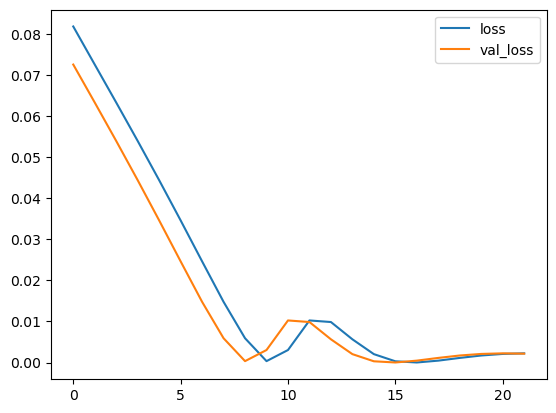

In [207]:
losses.plot()

In [212]:
length

48

In [213]:
test_predictions=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [214]:
true_prediction=scaler.inverse_transform(test_predictions)

In [215]:
test['predictions']=true_prediction
test

C:\Users\moham\AppData\Local\Temp\ipykernel_14984\1535319023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_prediction


,sine,predictions
45.1,0.899097,0.372300
45.2,0.938307,0.383234
45.3,0.968142,0.396015
45.4,0.988304,0.406936
45.5,0.998591,0.416698
45.6,0.998900,0.425774
45.7,0.989229,0.434434
45.8,0.969673,0.442828
45.9,0.940429,0.451029
46.0,0.901788,0.459069


<AxesSubplot:>

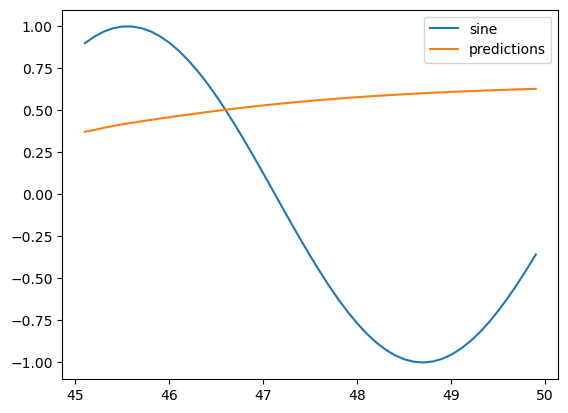

In [216]:
test.plot()

Note: As is clear my output is not acceptable. 
I used GPT to find out what is the problem. This is its' answers:



Look-ahead bias in TimeseriesGenerator:
Ensure that the TimeseriesGenerator is correctly set up to avoid any look-ahead bias. When generating sequences, the target should not include future data points that the model shouldn't have access to.

Data Scaling:
Verify that the scaling is correctly applied and consistent between training and testing. Make sure that both scaled_train and scaled_test are transformed using the same MinMaxScaler fitted on the training data.

Length of the Sequence:
The length parameter in the TimeseriesGenerator is crucial. Ensure that it is sufficiently long to capture the periodic nature of the sine wave. Currently, it's set to 48, which seems reasonable for a sine wave, but you might need to adjust it.

Model Complexity:
An LSTM with 70 units might be too complex for a simple sine wave prediction task, which can lead to overfitting. Try reducing the number of units or simplifying the model.

Prediction Loop:
Ensure that the loop for generating predictions uses the correct data shape and appends predictions correctly.

Epoch 1/80


C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 29/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2233

C:\Users\moham\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0531 - val_loss: 7.0294e-05
Epoch 2/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.7151e-05 - val_loss: 4.1452e-05
Epoch 3/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.0866e-04 - val_loss: 2.7398e-06
Epoch 4/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.7702e-05 - val_loss: 8.7251e-06
Epoch 5/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.5935e-05 - val_loss: 1.7628e-05
Epoch 6/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.9779e-05 - val_loss: 8.7069e-05
Epoch 7/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.2260e-04 - val_loss: 1.0911e-05
Epoch 8/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.7039e-05 - val_loss: 8.1680e-06
Epoch 9/80
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.8319e-05 - val_loss: 9.4269e-06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━

C:\Users\moham\AppData\Local\Temp\ipykernel_14984\833286967.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_prediction


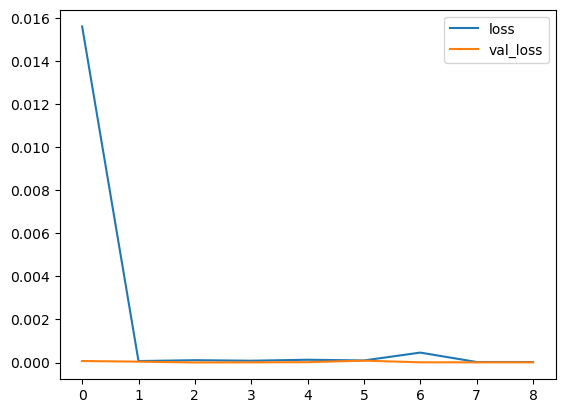

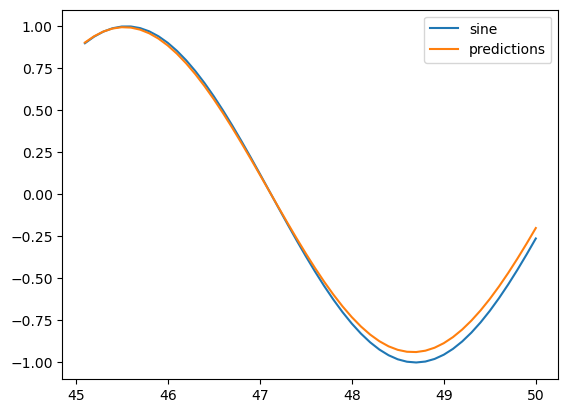

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Data preparation
x = np.linspace(0, 50, 501)
y = np.sin(x)
df = pd.DataFrame(data=y, index=x, columns=['sine'])

# Splitting data
test_percent = 0.1
test_point = np.round(len(df) * test_percent)
test_index = int(len(df) - test_point)
train = df.iloc[:test_index]
test = df.iloc[test_index:]

# Scaling data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Timeseries Generator
length = 48
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

# Model creation
model = Sequential()
model.add(LSTM(50, input_shape=(length, 1)))  # Reduced units to 50
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=6)

# Model training
model.fit(generator, epochs=80, validation_data=validation_generator, callbacks=[early_stop])

# Plotting loss
losses = pd.DataFrame(model.history.history)
losses.plot()

# Prediction
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, 1)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Inverse scaling
true_prediction = scaler.inverse_transform(test_predictions)
test['predictions'] = true_prediction
test.plot()

plt.show()
